In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

49


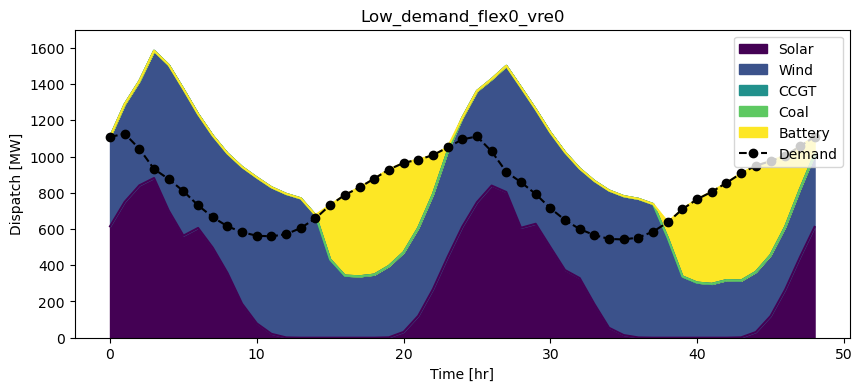

49


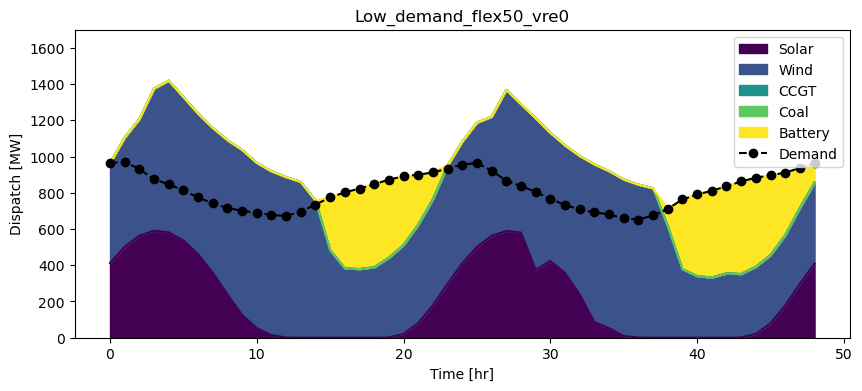

49


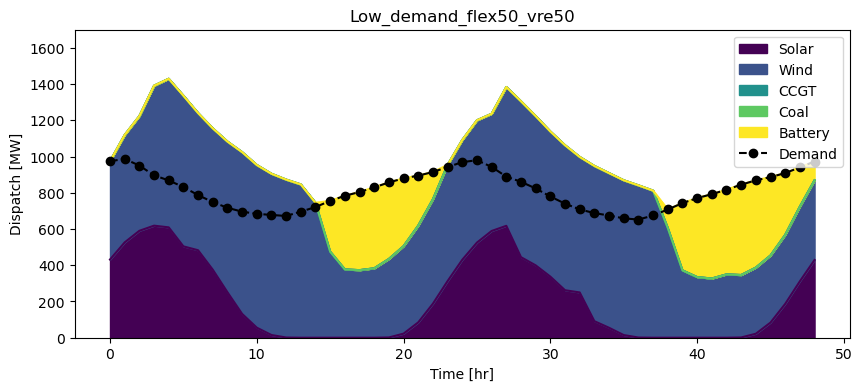

49


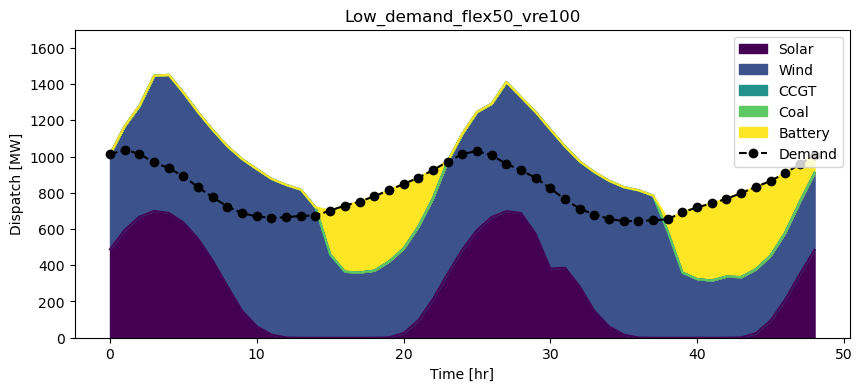

49


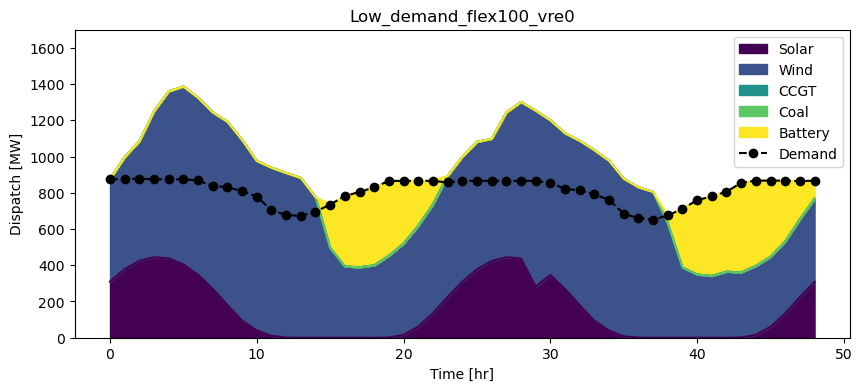

49


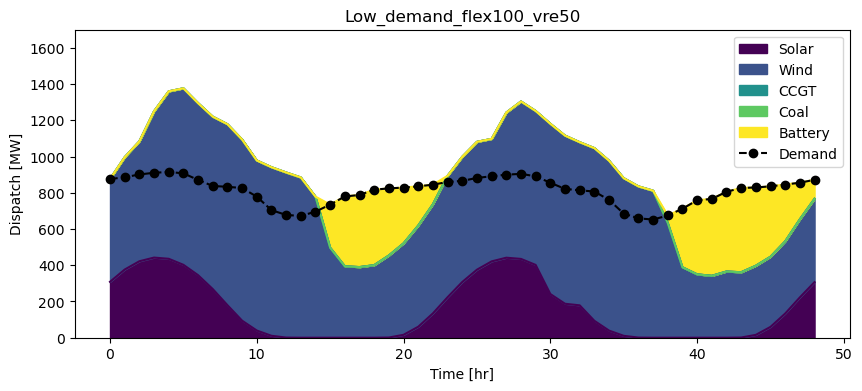

49


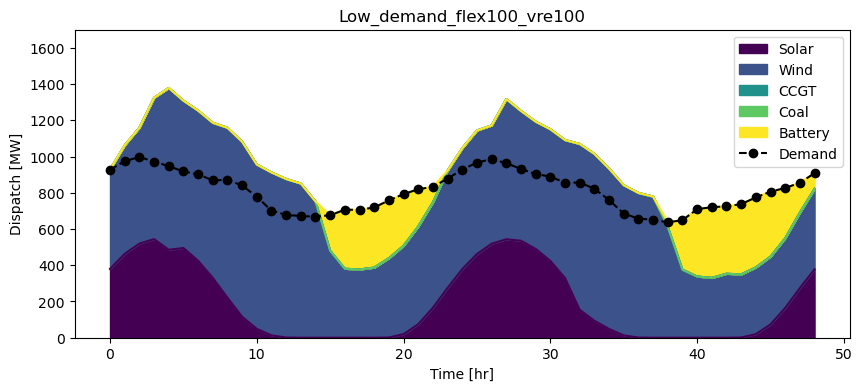

49


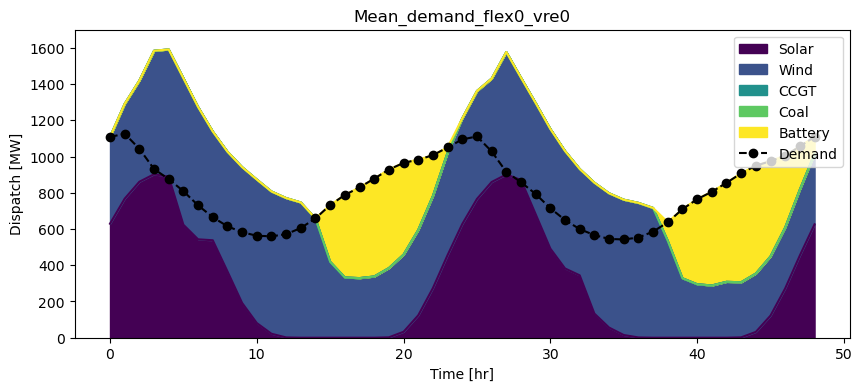

49


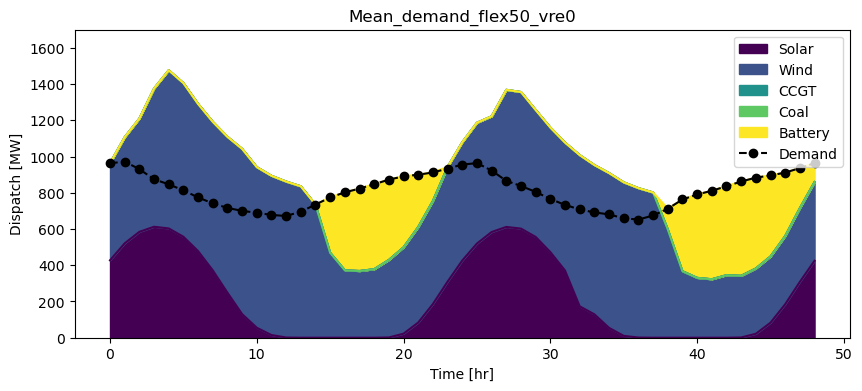

49


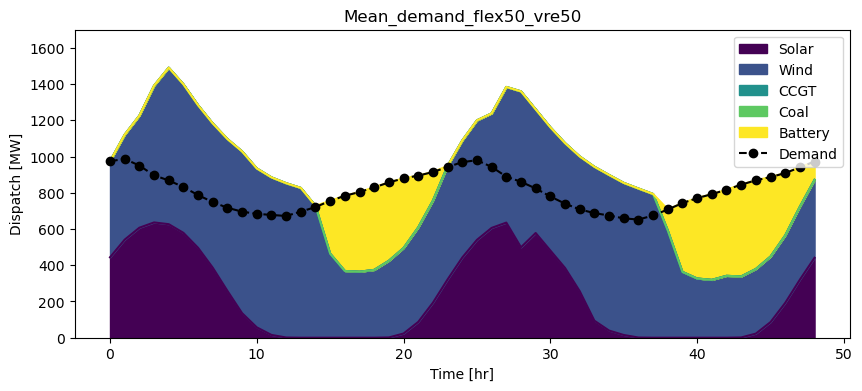

49


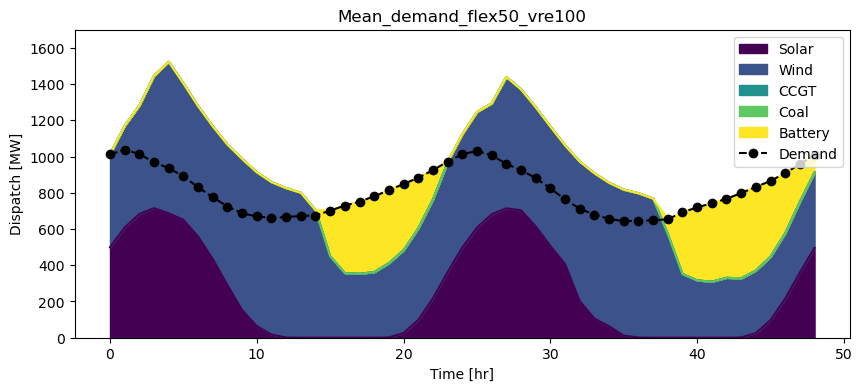

49


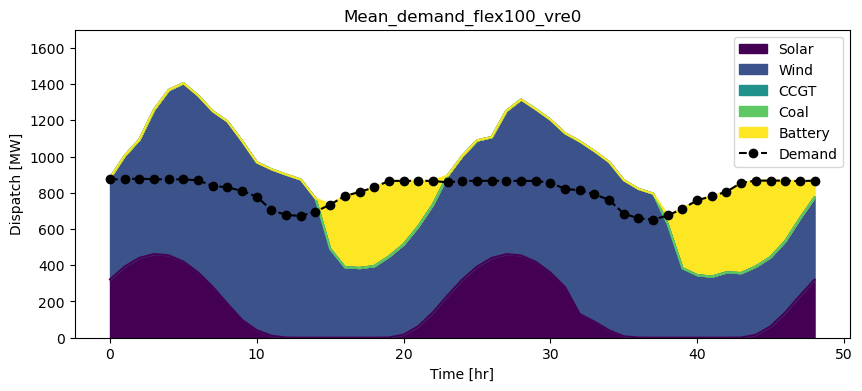

49


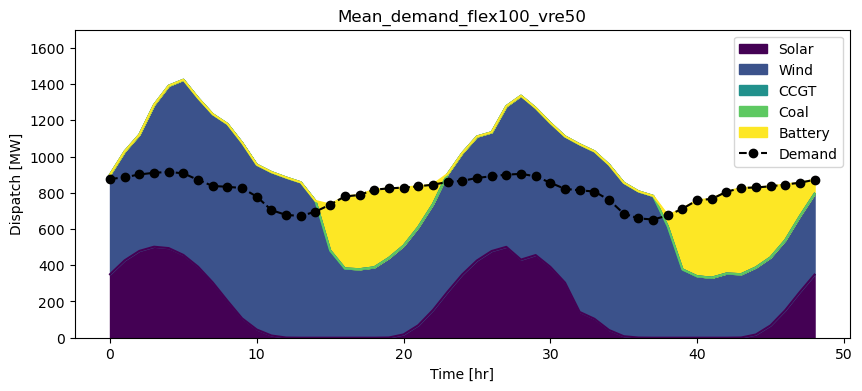

49


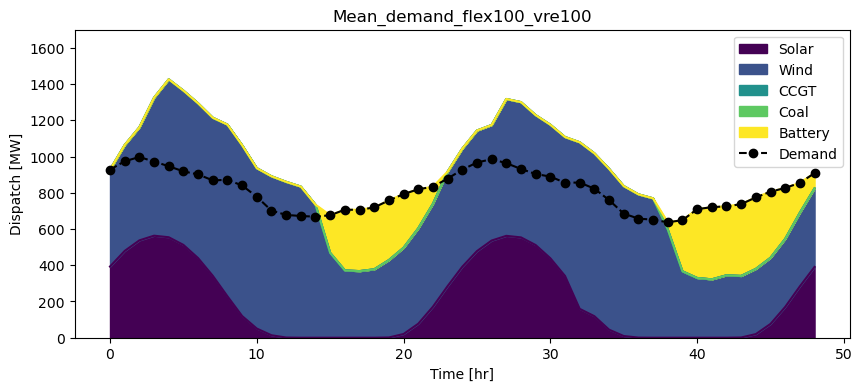

49


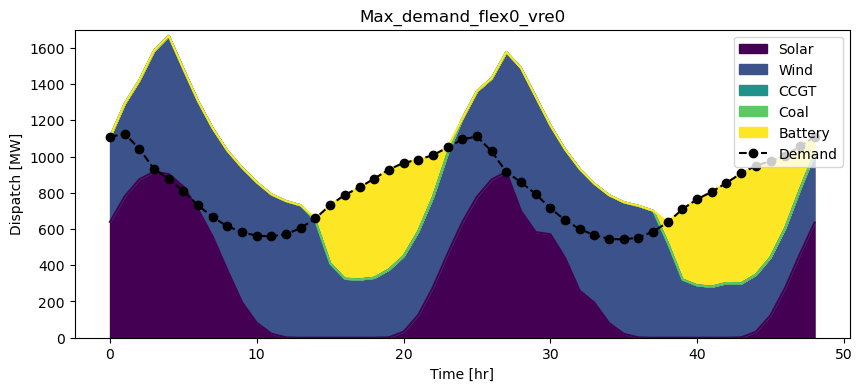

49


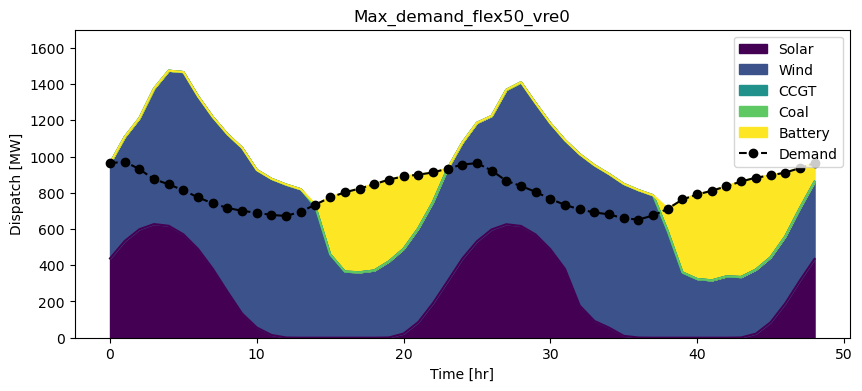

49


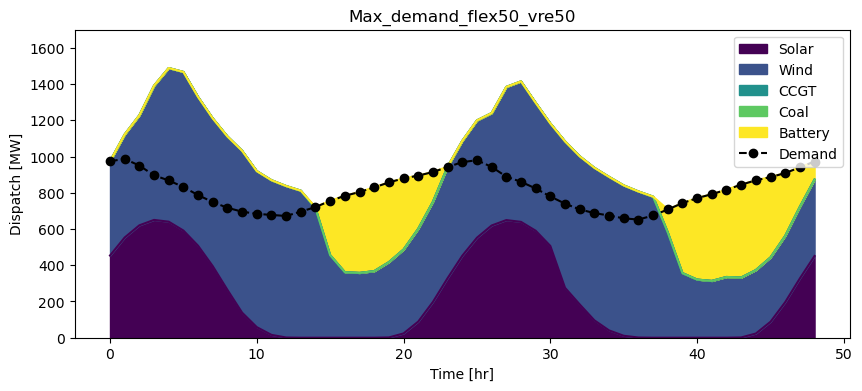

49


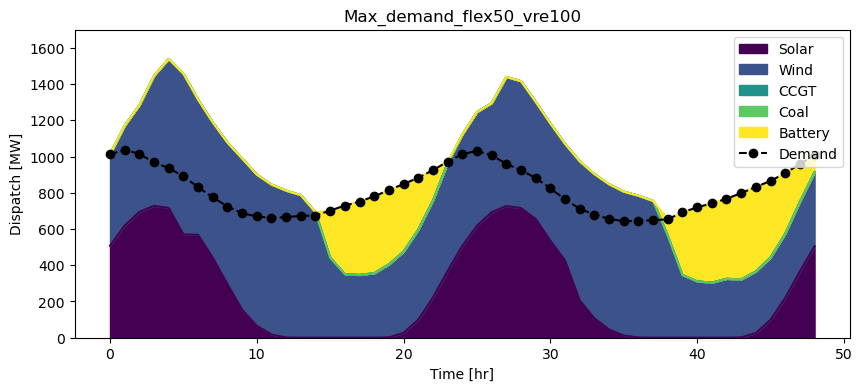

49


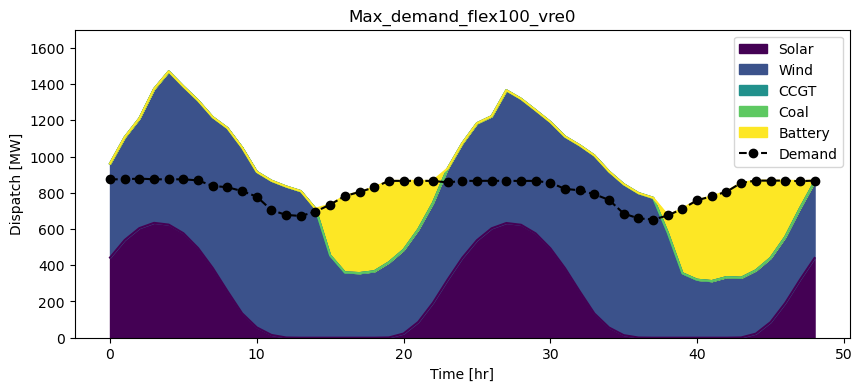

49


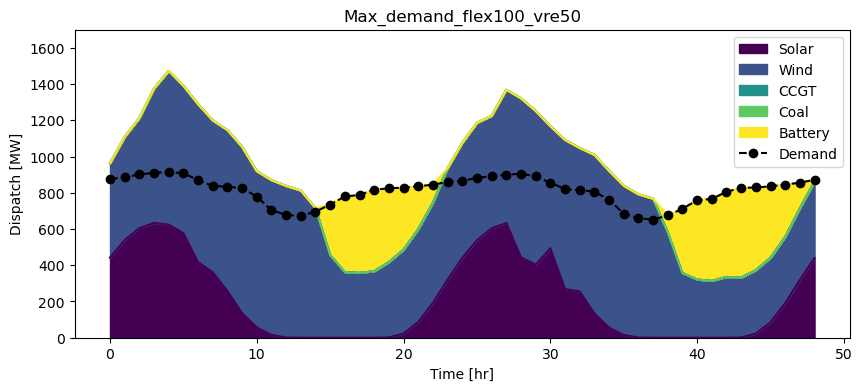

49


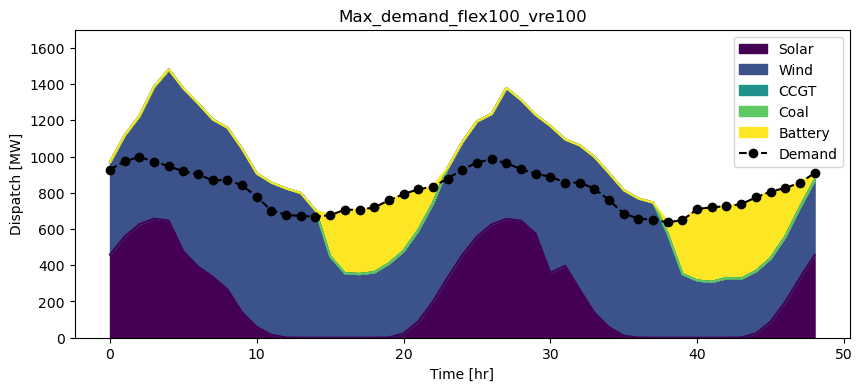

In [22]:
name_demand_flex_input = ["demand_flex0_vre0", "demand_flex50_vre0", "demand_flex50_vre50", 
"demand_flex50_vre100", "demand_flex100_vre0", "demand_flex100_vre50", "demand_flex100_vre100"]
price_scenario_ls = [ "Low", "Mean", "Max"]
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results'



for price in price_scenario_ls:
    for flex_scenario in name_demand_flex_input:

        csv_file_path = f"{main_folder}/{price}_cost/profiles_{flex_scenario}.csv"

        df = pd.read_csv(csv_file_path)
        df.reset_index(drop=True, inplace=True)

        # Set negative values to zero
        df = df.applymap(lambda x: max(0, x))

        
        fig, ax = plt.subplots(figsize=(10, 4))

        time = [i for i in range(49)]

        df["Time"] = time
        print(len(df))
        # Plot stacked area for the first five columns
        df.plot.area(x="Time", y=['Solar', 'Wind', 'CCGT', 'Coal', 'Battery'], ax=ax, stacked=True, colormap='viridis')
        

        # Plot Demand as a black dotted line
        df['Demand'].plot(x=df.index, y='Demand', color='black', linestyle='--', marker='o', label='Demand')

        # Customize plot
        ax.set_title(f'{price}_{flex_scenario}')
        ax.set_ylim(top=1700)
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Dispatch [MW]')
        ax.legend(loc="upper right")

        plt.show()

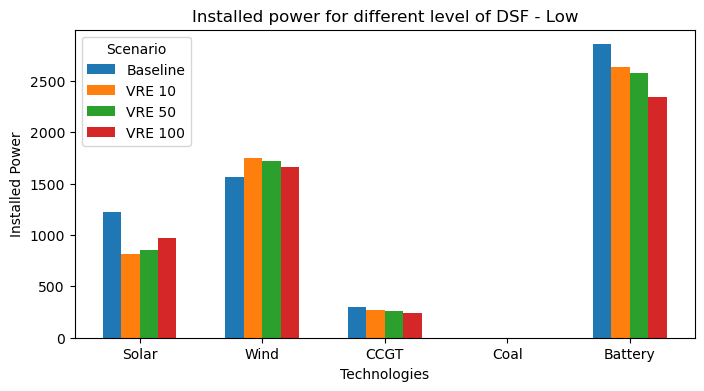

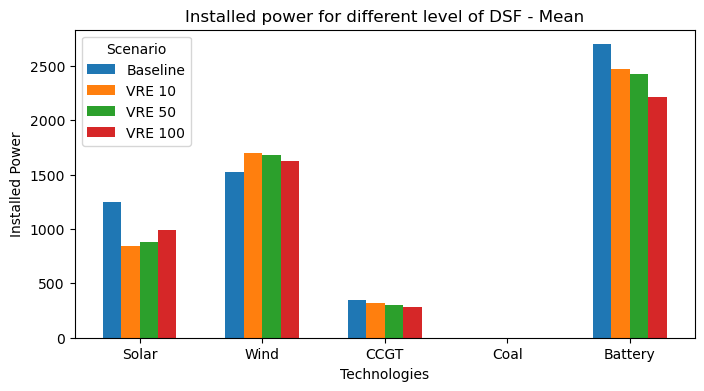

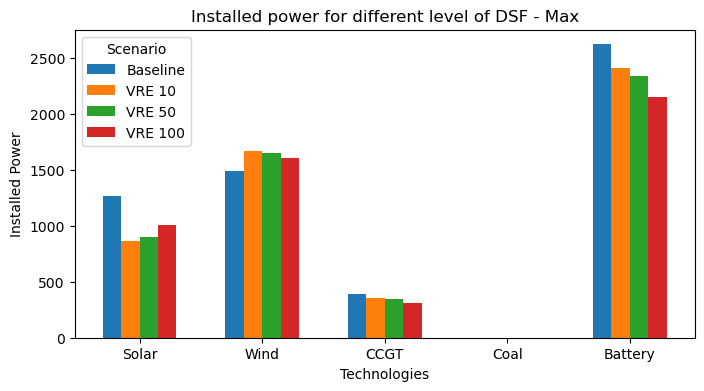

In [3]:
name_demand_flex_input = ["demand_flex0_vre0", "demand_flex50_vre0", "demand_flex50_vre50", 
"demand_flex50_vre100"]
price_scenario_ls = ["Low", "Mean", "Max"]
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results'



for price in price_scenario_ls:
    matrix_Power = np.zeros((5,4))

    for i, flex_scenario in enumerate(name_demand_flex_input):

        csv_file_path = f"{main_folder}/{price}_cost/power_{flex_scenario}.csv"


        df = pd.read_csv(csv_file_path)
        df.reset_index(drop=True, inplace=True)

        matrix_Power[:,i] = df["Installed Power"]



    categories = ['Solar', 'Wind', 'CCGT', 'Coal', 'Battery']
    legend_labels = ["Baseline", 'VRE 10', 'VRE 50', 'VRE 100']

    #Plotting
    fig, ax = plt.subplots(figsize=(8, 4))

    bar_width = 0.15  # Adjust the width of each bar
    #space_between_groups = 0.4  # Adjust the space between groups
    bar_positions = np.arange(len(categories))

    for i, label in enumerate(legend_labels):
        bars = ax.bar(bar_positions + i * (bar_width ), matrix_Power[:, i], bar_width, label=label)

    # Customize the plot
    ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width ) / 2)
    ax.set_xticklabels(categories)
    ax.legend(title='Scenario')
    ax.set_xlabel('Technologies')
    ax.set_ylabel('Installed Power')
    ax.set_title(f'Installed power for different level of DSF - {price}')

    plt.show()


In [27]:
class compute_mix_price:
    def __init__(self, main_folder) -> None:

        self.main_folder = main_folder

    def read_price_csv(self, scenario):

        self.fixed_cost = pd.read_csv(f"{self.main_folder}/data/fixed_cost_{scenario}.csv").values

        self.variable_cost = pd.read_csv(f"{self.main_folder}/data/variable_cost_{scenario}.csv").values

    def read_generation_power(self):

        scenarios_ls = ["min", "mean", "max"]


        flex_ls = ["0", "50", "100"]
        vre_ls = ["0", "50", "100"]


        self.cost_matrix = np.zeros((3,3,3))

        self.battery_matrix = np.zeros((3,3,3))

        for k, price in enumerate(price_scenario_ls):
            for i, flex_scenario in enumerate(flex_ls):
                for j, vre_scenario in enumerate(vre_ls):

                    csv_file_path_gen = f"{self.main_folder}/Results/{price}_cost/profiles_demand_flex{flex_scenario}_vre{vre_scenario}.csv"
                    csv_file_path_power = f"{self.main_folder}/Results/{price}_cost/power_demand_flex{flex_scenario}_vre{vre_scenario}.csv"

                    self.generation_array = pd.read_csv(csv_file_path_gen).values
                    self.power_array = pd.read_csv(csv_file_path_power).values

                    self.read_price_csv(scenarios_ls[k])

                    self.compute_mix_price()

                    self.cost_matrix[i,j,k] = self.tot_cost
                    
                    self.battery_matrix[i,j,k] = self.power_array[4]

    
    def compute_mix_price(self):
        self.power_price = np.sum(self.fixed_cost[0:5,:]*self.power_array) + 2*np.sum(self.fixed_cost[5,:])

        self.generation_price = np.sum(self.generation_array[:, 0:5]*self.variable_cost[0:5,0])
        
        self.tot_cost = self.power_price + self.generation_price

        print(self.tot_cost)

# Compute the total price of the mix

In [28]:
main_folder_price = "/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization"


compute_price = compute_mix_price(main_folder=main_folder_price)

compute_price.read_generation_power()

print(compute_price.cost_matrix)

2703016930.826078
2703016930.826078
2703016930.826078
2577810340.4166665
2562561572.794412
2521283215.2240553
2464502177.0476594
2438968638.695539
2381250725.4132023
3329170633.131632
3329170633.131632
3329170633.131632
3203226570.1492944
3179832454.563375
3114369505.550245
3072809814.322692
3042760664.6685596
2950334187.935311
3922129625.9676924
3922129625.9676924
3922129625.9676924
3791112907.8927507
3761051307.164453
3674977908.0522056
3643708908.5552406
3604480498.7866216
3487314899.956019
[[[2.70301693e+09 3.32917063e+09 3.92212963e+09]
  [2.70301693e+09 3.32917063e+09 3.92212963e+09]
  [2.70301693e+09 3.32917063e+09 3.92212963e+09]]

 [[2.57781034e+09 3.20322657e+09 3.79111291e+09]
  [2.56256157e+09 3.17983245e+09 3.76105131e+09]
  [2.52128322e+09 3.11436951e+09 3.67497791e+09]]

 [[2.46450218e+09 3.07280981e+09 3.64370891e+09]
  [2.43896864e+09 3.04276066e+09 3.60448050e+09]
  [2.38125073e+09 2.95033419e+09 3.48731490e+09]]]


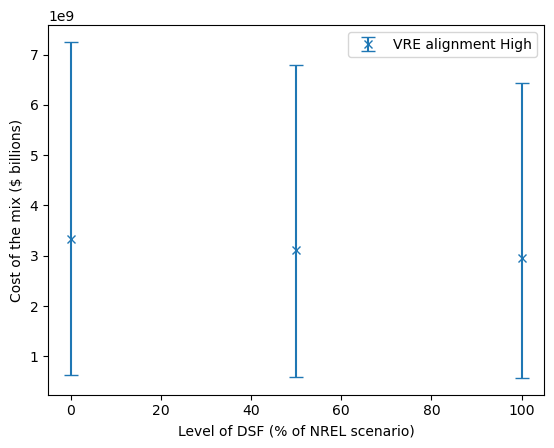

In [37]:
matrix = compute_price.cost_matrix

# Define the scenarios and corresponding indices
#scenarios = ["VRE alignment Low", "VRE alignment Med", "VRE alignment High"]
scenarios = ["VRE alignment High"]
#indices = [0, 1, 2]
indices = [2]

# Plotting for each scenario
for scenario, index in zip(scenarios, indices):
    # Extract data and error bars for the current scenario
    data = matrix[:, index, 1]
    low_error = matrix[:, index, 0]
    high_error = matrix[:, index, 2]

    # Define the list [0, 50, 100] for x-axis
    x_values = [0, 50, 100]

    # Create the scatter plot with error bars and caps
    plt.errorbar(x_values, data, yerr=[low_error, high_error], label=scenario, marker='x', linestyle='None', capsize=5)

# Set plot labels and legend
plt.xlabel('Level of DSF (% of NREL scenario)')
plt.ylabel('Cost of the mix ($ billions)')
plt.legend(loc="upper right")

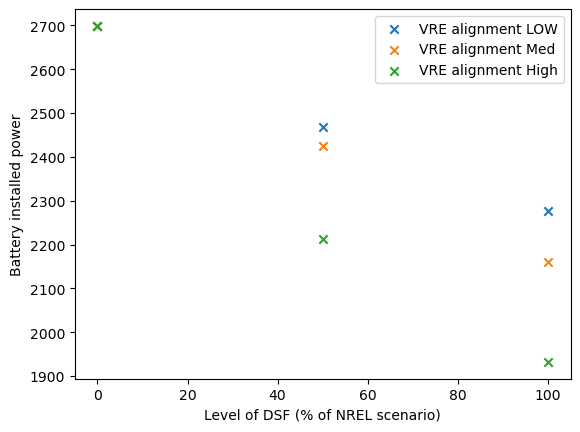

In [36]:
matrix_battery = compute_price.battery_matrix

# Define the scenarios and corresponding indices
scenarios = ["VRE alignment LOW", "VRE alignment Med", "VRE alignment High"]
indices = [0, 1, 2]

# Plotting for each scenario
for scenario, index in zip(scenarios, indices):
    # Extract data and error bars for the current scenario
    data = matrix_battery[:, index, 1]
    low_error = matrix_battery[:, index, 0]
    high_error = matrix_battery[:, index, 2]

    # Define the list [0, 50, 100] for x-axis
    x_values = [0, 50, 100]

    # Create the scatter plot with error bars and caps
    plt.scatter(x_values, data, label=scenario, marker='x', linestyle='None')

# Set plot labels and legend
plt.xlabel('Level of DSF (% of NREL scenario)')
plt.ylabel('Battery installed power')
#plt.ylim(0, None)
plt.legend(loc="upper right")

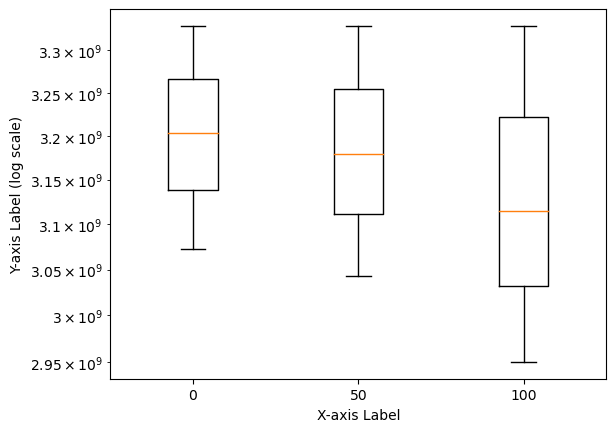

In [40]:
matrix = compute_price.cost_matrix
# Define the scenarios and corresponding indices
# Define the scenarios and corresponding indices
scenarios = ["VRE alignment LOW", "VRE alignment Med", "VRE alignment High"]
indices = [0, 1, 2]

# Prepare data for box plots
boxplot_data = [matrix[:, index, 1] for index in indices]

# Define the list [0, 50, 100] for x-axis
x_values = [0, 50, 100]

# Create the box plots
plt.boxplot(boxplot_data, labels=x_values)
plt.xticks(ticks=np.arange(1, len(x_values) + 1), labels=x_values)

# Set plot labels and y-axis to a logarithmic scale
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label (log scale)')
plt.yscale('log')

# Show the plot
plt.show()